# TASK-2 Supervised Machine Learning Model

##  Problem statement

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.



## Data Preprocessing 

### 1. Importing Libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Import Dataset


Data can be found at url http://bit.ly/w-data

In [145]:
dataset =pd.read_csv("student_scores.csv")

In [146]:
type(dataset)


pandas.core.frame.DataFrame

This will provide us our whole datase.

In [147]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now, Using the Head function gives the First five rows of our dataset

In [148]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


To check the Overview of our dataset, We use Info function.

In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


To check how many rows and columns our dataset have, we will use shape.

In [150]:
dataset.shape     #It shows that our dataset have 25 rows and 2 column

(25, 2)

Let's Check unique values in Both hours and scores column

In [151]:
dataset['Hours'].unique()     #Below are the unique values in Hours column

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [152]:
dataset['Scores'].unique()  #Below are the uniique values in Scores column

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86], dtype=int64)

Now, To get the datatype of our particuar column, we will use dtypes as shown

In [153]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

Now, We will check if our dataset contains any null values or not in both the column

In [154]:
dataset['Hours'].isnull().sum()    # No null values is present

0

In [155]:
dataset['Scores'].isnull().sum()   #No null value is present

0

 ### 3. Statistical Information related to our data.

In [156]:

dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [159]:
dataset.rename(columns={'Hours':'Study_hours'},inplace=True)

In [160]:
dataset.head()

,Study_hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 4. Split Dependent and Independent variables and Visualize the data:

In [161]:
dataset.isnull().sum()

Study_hours    0
Scores         0
dtype: int64

In [162]:
x= dataset.iloc[:,:1]

In [163]:
print(x)

    Study_hours
0           2.5
1           5.1
2           3.2
3           8.5
4           3.5
5           1.5
6           9.2
7           5.5
8           8.3
9           2.7
10          7.7
11          5.9
12          4.5
13          3.3
14          1.1
15          8.9
16          2.5
17          1.9
18          6.1
19          7.4
20          2.7
21          4.8
22          3.8
23          6.9
24          7.8


In [164]:
type(x)

pandas.core.frame.DataFrame

In [165]:
x= dataset.iloc[:,:-1].values

In [166]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [167]:
x.ndim

2

In [168]:
type(x)

numpy.ndarray

In [169]:
y= dataset.iloc[:,1:]

In [170]:
print(y)

    Scores
0       21
1       47
2       27
3       75
4       30
5       20
6       88
7       60
8       81
9       25
10      85
11      62
12      41
13      42
14      17
15      95
16      30
17      24
18      67
19      69
20      30
21      54
22      35
23      76
24      86


In [171]:
type(y)

pandas.core.frame.DataFrame

In [172]:
y= dataset.iloc[:,1:].values   #convert from dataframe to numpy array

In [173]:
print(y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


### 5. Countplot:

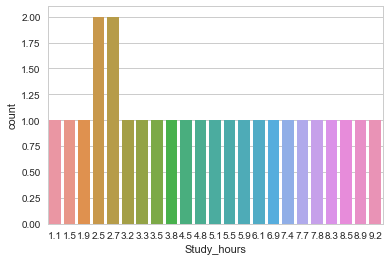

In [174]:
sns.countplot(x='Study_hours',data=dataset)

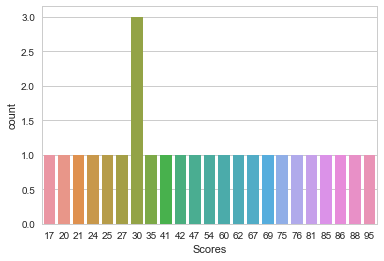

In [175]:
sns.countplot('Scores',data=dataset)

### 6. Plotting the distribution of scores


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

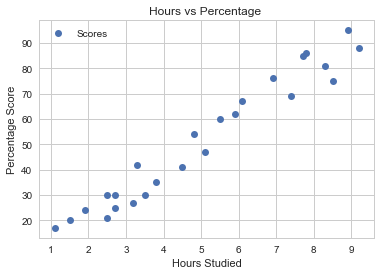

In [177]:
dataset.plot(x='Study_hours', y='Scores', style='o')  
plt.title('Hours vs Percentage ')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

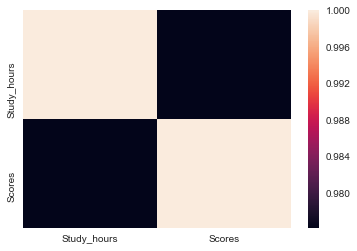

In [178]:
sns.heatmap(dataset.corr())

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### 7. BOX PLOT

Box plots plays an important role as it provide us a visual summary of data all the statistical values in terms of graph.

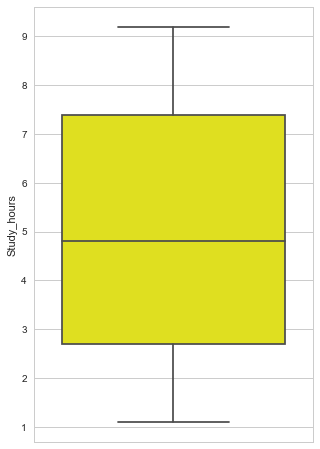

In [98]:
plt.figure(figsize=(5,8))
sns.boxplot(y='Study_hours',data=dataset,color='yellow')

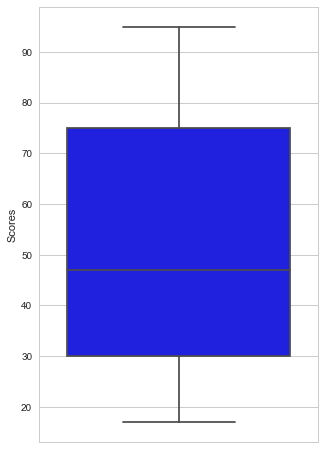

In [96]:
plt.figure(figsize=(5,8))
sns.boxplot(y='Scores',data=dataset,color='blue')

### 8. Prepare the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [99]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

Split Test and train data  

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)      

It splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

### 9. Training the Algorithm


In [104]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("End of Training")

End of Training


To retrieve the intercept:

In [105]:
print(regressor.intercept_)

2.018160041434683


For retrieving the slope (coefficient of x):

In [106]:
print(regressor.coef_)

[9.91065648]


In [107]:
line = regressor.coef_*x+regressor.intercept_
line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

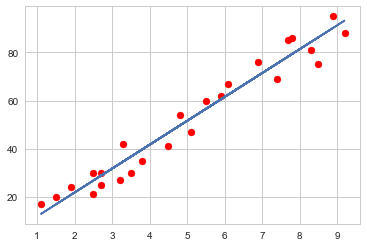

In [108]:
plt.scatter(x, y,color='r')
plt.plot(x, line);
plt.show()

### 10. Predicting the Values:

As our model is already trained now it's time to make some prediction.

In [109]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [110]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [121]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [122]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
y_predict=lr.predict(x_test)

In [124]:
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [125]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [126]:
lr.predict(np.array([[5]]))

array([51.57144244])

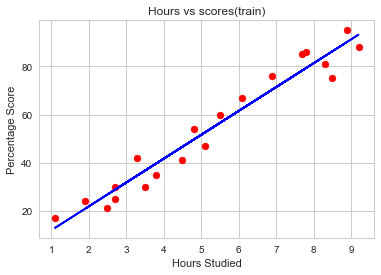

In [127]:
#visualization of trained data
plt.scatter(x_train,y_train,color = 'Red')
plt.plot(x_train,lr.predict(x_train),color = 'blue')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours vs scores(train)")
plt.show()

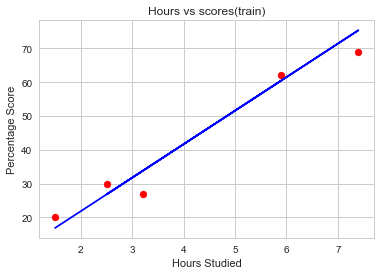

In [129]:
#visualization of Predicted data
plt.scatter(x_test,y_test,color = 'Red')
plt.plot(x_test,lr.predict(x_test),color = 'blue')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.title("Hours vs scores(train)")
plt.show()

#### You can also test your own data as given below.


In [130]:
Study_hours=9.25
own_prediction=regressor.predict([[Study_hours]]).round(2)
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(own_prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69


### Evaluating the model:

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [136]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
print('Root Of Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Root Of Mean Squared Error: 4.6474476121003665


In [134]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 21.5987693072174


Here the difference between MAE and RMSE are very less ,means that error size are less,our data and model are more representative with respect to mean.
Hence, our linear regression model works successfully.